In [11]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, roc_auc_score

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [12]:
from collections import Counter

In [13]:
pwd

'c:\\Users\\yixua\\Desktop\\My_workspace\\capstone\\streamlit_eolab'

In [14]:
## label data
meta_data_good=pd.read_excel('240823_DataSummary.xlsx',sheet_name='GoodSwims')
meta_data_bad=pd.read_excel('240823_DataSummary.xlsx',sheet_name='BadSwims')
print("There are ",len(meta_data_good)," good swims")
print("There are ",len(meta_data_bad)," bad swims")

meta_combined=pd.concat([meta_data_good,meta_data_bad],axis=0)
print("There are ",len(meta_combined)," swims in total")
# filter out the columns that are not needed
meta_combined=meta_combined[['swim_id','stroke']]
print(meta_combined.head())

id2label = {}
for index, row in meta_combined.iterrows():
    if row['stroke'] == "BackStroke":
        id2label[row['swim_id']] = 0
    elif row['stroke'] == "Butterfly":
        id2label[row['swim_id']] = 1
    elif row['stroke'] == "Freestyle":
        id2label[row['swim_id']] = 2
    else:
        print("Wired Type")

There are  249  good swims
There are  309  bad swims
There are  558  swims in total
                                swim_id      stroke
0  eca387ee-efe3-4b52-b4ba-2ad59f9b3c56   Freestyle
1  ecc649a0-e9b7-4d89-bdb4-5446913720bf   Freestyle
2  9c3a0f82-003d-43d7-975a-0e63c2c59657   Freestyle
3  3b3dff00-08d4-4e19-8b56-ac95be0d755e   Freestyle
4  f2c736be-8c1a-4016-9cc9-d7875b40e996  BackStroke


In [15]:
files = []
pre = "../combined_2"
for i in os.listdir(pre):
    if ".csv" in i:
        files.append(i)
print(files)

['0057f3aa-a1ec-4d6a-9776-846f6e8fd0e4.csv', '00798875-f5bc-4ffe-a4f6-b8c38ffb6a6f.csv', '00d6b11e-bbcb-4e5b-aadf-5dc7212fd92e.csv', '01082af2-c81b-407a-a7cd-3cbd58ef860f.csv', '01189fe4-b286-480e-a724-8f2ca82e2a2f.csv', '01d1cd74-b3ee-472f-bf85-b84318451509.csv', '0289f9c2-ef67-45cb-9793-e1c5846970d7.csv', '02b8a1b3-6a99-4a1e-98d5-dbbc3f1898b6.csv', '0370272b-09b1-40d4-8d72-6c86765b3d4e.csv', '03c79948-9b13-47b7-aba4-84619cd8b24b.csv', '041f1d30-8879-4d2b-aa1e-b1c931da4470.csv', '04325ef3-e185-4733-8e6e-9eb3787eb56b.csv', '04506038-ab19-489b-ac6d-7d25cfd10472.csv', '046bed2a-611f-4615-9e47-f7fe1366f42e.csv', '05d4fd6c-a185-4918-bbca-256eaa52db8b.csv', '06b0e4b7-0c08-424e-9ee5-b5e07a286dd4.csv', '0769171b-5582-4f57-b21e-23d1b81283df.csv', '07e3ef75-025f-4cb3-8ddb-10b744a2deeb.csv', '07f6a49d-8573-4f58-96e3-1229cb3881ed.csv', '080bed25-070a-44db-a66e-c38d78cc3ea2.csv', '0849f9cb-1a25-4b3c-adf8-8753314fc888.csv', '087a17e3-7aeb-4a80-bcd8-b7dbaf20e057.csv', '08919263-9c89-4721-9472-7026ce

In [16]:
# labels = {"115":"Frontcrawl", "116":"Breast Stroke", "117":"Backstroke", "118":"Butterfly"}
features = ['fPressureFront_1', 'fPressureSide_1', 'acceleration.x_1',
       'acceleration.y_1', 'acceleration.z_1', 'quaternion.i_1', 'quaternion.j_1',
       'quaternion.k_1', 'quaternion.real_1',  'fPressureFront_2', 'fPressureSide_2', 'acceleration.x_2',
'acceleration.y_2', 'acceleration.z_2', 'quaternion.i_2', 'quaternion.j_2',
'quaternion.k_2', 'quaternion.real_2']

In [18]:
#以100拆分,前后去除200个数据点
data_lst = []
label_lst = []

for file in files:
    df = pd.read_csv(pre + "/" + file)
    df_selected = df[features]
    nums = np.array(df_selected)
    print(nums.shape)
    # 6000
    uper = min(len(nums)-200, 6000)
    for i in range(200, uper, 50):

        if np.isnan(nums[i: i+100,:]).any():
            continue
        elif np.isinf(nums[i: i+100,:]).any():
            continue
        else:
            data_lst.append(nums[i: i+100,:])
            label_lst.append(id2label[file.split(".")[0]])

(2509, 18)
(11540, 18)
(19845, 18)
(41625, 18)
(1090, 18)
(1553, 18)
(10224, 18)
(3479, 18)
(7750, 18)
(1670, 18)
(8329, 18)
(6041, 18)
(9612, 18)
(11783, 18)
(2008, 18)
(140038, 18)
(9245, 18)
(67521, 18)
(10987, 18)
(25867, 18)
(8710, 18)
(3697, 18)
(1977, 18)
(3329, 18)
(2609, 18)
(3027, 18)
(161059, 18)
(6815, 18)
(6090, 18)
(153790, 18)
(6744, 18)
(1917, 18)
(2073, 18)
(41569, 18)
(3666, 18)
(2472, 18)
(84021, 18)
(24894, 18)
(1758, 18)
(4063, 18)
(57588, 18)
(2397, 18)
(2918, 18)
(12957, 18)
(3154, 18)
(24656, 18)
(2492, 18)
(146419, 18)
(2951, 18)
(4362, 18)
(47585, 18)
(3882, 18)
(7736, 18)
(14245, 18)
(139659, 18)
(12221, 18)
(4762, 18)
(96554, 18)
(1027, 18)
(7415, 18)
(180909, 18)
(6929, 18)
(2795, 18)
(2678, 18)
(6252, 18)
(130362, 18)
(26738, 18)
(15218, 18)
(8729, 18)
(100540, 18)
(1128, 18)
(156375, 18)
(11250, 18)
(27675, 18)
(24363, 18)
(5592, 18)
(5117, 18)
(6413, 18)
(1609, 18)
(3083, 18)
(1779, 18)
(6925, 18)
(12315, 18)
(56912, 18)
(2735, 18)
(224934, 18)
(4514, 18

In [19]:
print("total data samples: ", len(data_lst))
print("total label number: ", len(label_lst))

total data samples:  47523
total label number:  47523


In [20]:
import torch
from torch.utils.data import Dataset, DataLoader

class SwimDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.data[idx]), torch.LongTensor([self.targets[idx]])

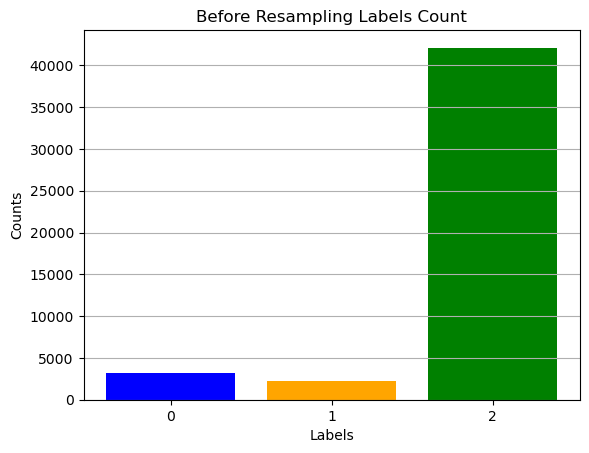

In [21]:
## before resampling
import matplotlib.pyplot as plt
unique_labels, counts = np.unique(label_lst, return_counts=True)

plt.bar(unique_labels, counts, color=['blue', 'orange', 'green'])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Before Resampling Labels Count')
plt.xticks(unique_labels)
plt.grid(axis='y')

plt.show()

In [22]:
## resampling
df = pd.DataFrame(range(len(data_lst)), columns=['index'])
df['label'] = label_lst

target_samples_per_class = 10000

resampled_df = pd.DataFrame()

for label in df['label'].unique():
    class_samples = df[df['label'] == label]
    sampled_class = class_samples.sample(n=target_samples_per_class, replace=True)
    resampled_df = pd.concat([resampled_df, sampled_class])

label_lst_resample = list(resampled_df["label"])
index_resample = resampled_df[["index"]]
data_lst_resample = np.array(data_lst)[list(resampled_df["index"])]

In [23]:
print("Length of data", len(data_lst_resample))
print("Length of label", len(label_lst_resample))

Length of data 30000
Length of label 30000


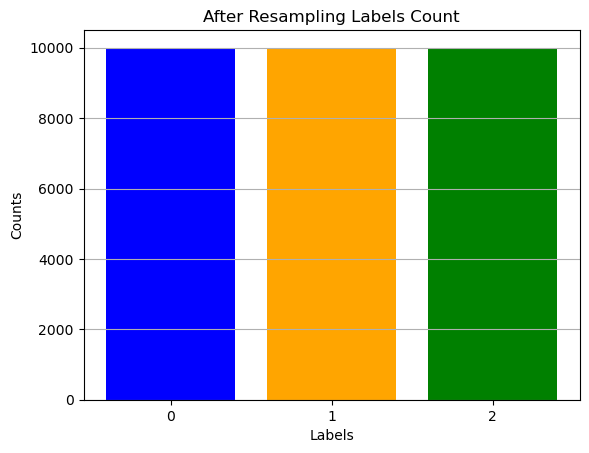

In [24]:
## after resampling
import matplotlib.pyplot as plt
unique_labels, counts = np.unique(label_lst_resample, return_counts=True)

plt.bar(unique_labels, counts, color=['blue', 'orange', 'green'])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('After Resampling Labels Count')
plt.xticks(unique_labels)
plt.grid(axis='y')

plt.show()

In [25]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(np.array(data_lst_resample).reshape(-1, 18))
data_scaled = data_scaled.reshape(30000, 100, 18)

In [26]:
from sklearn.model_selection import train_test_split

train_data, temp_data, train_targets, temp_targets = train_test_split(data_scaled, label_lst_resample, test_size=0.3, stratify=label_lst_resample, random_state=42)
val_data, test_data, val_targets, test_targets = train_test_split(temp_data, temp_targets, test_size=0.5, stratify=temp_targets, random_state=42)

print("训练集标签分布:", dict(zip(*np.unique(train_targets, return_counts=True))))
print("验证集标签分布:", dict(zip(*np.unique(val_targets, return_counts=True))))
print("测试集标签分布:", dict(zip(*np.unique(test_targets, return_counts=True))))

train_dataset = SwimDataset(train_data, train_targets)
val_dataset = SwimDataset(val_data, val_targets)
test_dataset = SwimDataset(test_data, test_targets)

train_loader_scaled = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader_scaled = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader_scaled = DataLoader(test_dataset, batch_size=128, shuffle=False)

训练集标签分布: {0: 7000, 1: 7000, 2: 7000}
验证集标签分布: {0: 1500, 1: 1500, 2: 1500}
测试集标签分布: {0: 1500, 1: 1500, 2: 1500}


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [29]:
from time import time

input_size = 18
hidden_sizes = [128]
learning_rates = [0.01]
num_epochs = 10

hidden_size_t = []
learning_rate_t = []

train_aucs = []
train_f1_macros = []
train_f1_micros = []
test_aucs = []
test_f1_macros = []
test_f1_micros = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:

        print(f"\n Testing with hidden size: {hidden_size}, learning rate: {learning_rate} ... ")
        hidden_size_t.append(hidden_size)
        learning_rate_t.append(learning_rate)

        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model = RNNModel(input_size, hidden_size,  3).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        for epoch in range(num_epochs):
            pred_label = []
            pred_prob = []
            actual_label = []
            model.train()
            total_train = 0
            correct_train = 0
            start = time()
            for inputs, labels in train_loader_scaled:
                actual_label.extend(labels.numpy().tolist())
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels.view(-1))
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                _, predicted = torch.max(outputs.data, 1)
                pred_label.extend(predicted.cpu().numpy().tolist())
                for ele in outputs.data.cpu().numpy().tolist():
                    if type(ele) == list:
                        pred_prob.append(softmax(ele))# 【1， 2， 3】 -> [ e^1/(e^1 + e^2+e^3), e^2/(e^1 + e^2+e^3), e^3/(e^1 + e^2+e^3)]
                # print(outputs.data.cpu().numpy().shape)
                total_train += labels.view(-1).size(0)
                correct_train += (predicted == labels.view(-1)).sum().item()

            # print(pred_prob[:10])
            train_auc = roc_auc_score(np.array(actual_label).reshape(-1,1), np.array(pred_prob).reshape(-1, 3), multi_class = "ovr") # one vs rest
            train_f1_macro =  f1_score(actual_label, pred_label, average = "macro")
            train_f1_micro = f1_score(actual_label, pred_label, average = "micro")


            total = 0
            correct = 0
            test_pred_label = []
            test_pred_prob = []
            test_actual_label = []
            for inputs, labels in test_loader_scaled:
                test_actual_label.extend(labels.numpy().tolist())
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                test_pred_label.extend(predicted.cpu().numpy().tolist())
                for ele in outputs.data.cpu().numpy().tolist():
                    if type(ele) == list:
                        test_pred_prob.append(softmax(ele))
                total += labels.view(-1).size(0)
                correct += (predicted == labels.view(-1)).sum().item()

            test_auc = roc_auc_score(np.array(test_actual_label).reshape(-1,1), np.array(test_pred_prob).reshape(-1, 3), multi_class = "ovr")
            test_f1_macro =  f1_score(test_actual_label, test_pred_label, average = "macro")
            test_f1_micro = f1_score(test_actual_label, test_pred_label, average = "micro")


            print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}\nTrain Accuracy: {(correct_train/total_train):.4f}, Train Macro F1: {train_f1_macro:.4f}, Train Micro F1: {train_f1_micro:.4f}, Train AUC: {train_auc:.4f}\nTest Accuracy: {(correct/total):.4f},  Test Macro F1: {test_f1_macro:.4f}, Test Micro F1: {test_f1_micro:.4f}, Train AUC: {test_auc:.4f}\nTime Cost: {time() - start:.2f}s\n')
            start = time()

        train_aucs.append(train_auc)
        train_f1_macros.append(train_f1_macro)
        train_f1_micros.append(train_f1_micro)

        test_aucs.append(test_auc)
        test_f1_macros.append(test_f1_macro)
        test_f1_micros.append(test_f1_micro)


 Testing with hidden size: 128, learning rate: 0.01 ... 
Epoch [1/10], Training Loss: 0.7923
Train Accuracy: 0.5027, Train Macro F1: 0.4980, Train Micro F1: 0.5027, Train AUC: 0.6834
Test Accuracy: 0.5333,  Test Macro F1: 0.5187, Test Micro F1: 0.5333, Train AUC: 0.7104
Time Cost: 1.56s

Epoch [2/10], Training Loss: 0.9275
Train Accuracy: 0.5628, Train Macro F1: 0.5581, Train Micro F1: 0.5628, Train AUC: 0.7408
Test Accuracy: 0.5264,  Test Macro F1: 0.5130, Test Micro F1: 0.5264, Train AUC: 0.7233
Time Cost: 1.16s

Epoch [3/10], Training Loss: 0.7543
Train Accuracy: 0.5776, Train Macro F1: 0.5743, Train Micro F1: 0.5776, Train AUC: 0.7544
Test Accuracy: 0.5931,  Test Macro F1: 0.5892, Test Micro F1: 0.5931, Train AUC: 0.7679
Time Cost: 1.18s

Epoch [4/10], Training Loss: 0.8753
Train Accuracy: 0.5890, Train Macro F1: 0.5869, Train Micro F1: 0.5890, Train AUC: 0.7643
Test Accuracy: 0.5711,  Test Macro F1: 0.5662, Test Micro F1: 0.5711, Train AUC: 0.7568
Time Cost: 1.18s

Epoch [5/10], 

In [30]:
result = []

for i in range(len(hidden_size_t)):
    temp = [
        hidden_size_t[i],
        learning_rate_t[i],
        test_f1_macros[i],
        test_f1_micros[i],
        test_aucs[i]
    ]
    result.append(temp)

import pandas as pd
df = pd.DataFrame(result, columns=["Hidden Size", "Learning Rate", "Test F1 Macro", "Test F1 Micro", "Test Auc"])
df.to_csv("RNN.csv", index=False)

In [31]:
df

,Hidden Size,Learning Rate,Test F1 Macro,Test F1 Micro,Test Auc
0,128,0.01,0.502814,0.519111,0.731073


In [32]:

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out


In [33]:
from time import time



input_size = 18
hidden_sizes = [ 256]
learning_rates = [0.0005]
num_epochs = 10
num_classes = 3

hidden_size_t = []
learning_rate_t = []

train_aucs = []
train_f1_macros = []
train_f1_micros = []
test_aucs = []
test_f1_macros = []
test_f1_micros = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:

        print(f"\n Testing with hidden size: {hidden_size}, learning rate: {learning_rate} ... ")
        hidden_size_t.append(hidden_size)
        learning_rate_t.append(learning_rate)

        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model = LSTMModel(input_size, hidden_size, num_classes).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        for epoch in range(num_epochs):
            pred_label = []
            pred_prob = []
            actual_label = []
            model.train()
            total_train = 0
            correct_train = 0
            start = time()
            for inputs, labels in train_loader_scaled:
                actual_label.extend(labels.numpy().tolist())
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels.view(-1))
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                _, predicted = torch.max(outputs.data, 1)
                pred_label.extend(predicted.cpu().numpy().tolist())
                for ele in outputs.data.cpu().numpy().tolist():
                    if type(ele) == list:
                        pred_prob.append(softmax(ele))
                # print(outputs.data.cpu().numpy().shape)
                total_train += labels.view(-1).size(0)
                correct_train += (predicted == labels.view(-1)).sum().item()

            # print(pred_prob[:10])
            train_auc = roc_auc_score(np.array(actual_label).reshape(-1,1), np.array(pred_prob).reshape(-1,3), multi_class = "ovr")
            train_f1_macro =  f1_score(actual_label, pred_label, average = "macro")
            train_f1_micro = f1_score(actual_label, pred_label, average = "micro")

            total = 0
            correct = 0
            test_pred_label = []
            test_pred_prob = []
            test_actual_label = []
            for inputs, labels in test_loader_scaled:
                test_actual_label.extend(labels.numpy().tolist())
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                test_pred_label.extend(predicted.cpu().numpy().tolist())
                for ele in outputs.data.cpu().numpy().tolist():
                    if type(ele) == list:
                        test_pred_prob.append(softmax(ele))
                total += labels.view(-1).size(0)
                correct += (predicted == labels.view(-1)).sum().item()

            test_auc = roc_auc_score(np.array(test_actual_label).reshape(-1,1), np.array(test_pred_prob).reshape(-1, 3), multi_class = "ovr")
            test_f1_macro =  f1_score(test_actual_label, test_pred_label, average = "macro")
            test_f1_micro = f1_score(test_actual_label, test_pred_label, average = "micro")


            print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}\nTrain Accuracy: {(correct_train/total_train):.4f}, Train Macro F1: {train_f1_macro:.4f}, Train Micro F1: {train_f1_micro:.4f}, Train AUC: {train_auc:.4f}\nTest Accuracy: {(correct/total):.4f},  Test Macro F1: {test_f1_macro:.4f}, Test Micro F1: {test_f1_micro:.4f}, Train AUC: {test_auc:.4f}\nTime Cost: {time() - start:.2f}s\n')
            start = time()

        train_aucs.append(train_auc)
        train_f1_macros.append(train_f1_macro)
        train_f1_micros.append(train_f1_micro)

        test_aucs.append(test_auc)
        test_f1_macros.append(test_f1_macro)
        test_f1_micros.append(test_f1_micro)


 Testing with hidden size: 256, learning rate: 0.0005 ... 
Epoch [1/10], Training Loss: 1.0466
Train Accuracy: 0.6269, Train Macro F1: 0.6216, Train Micro F1: 0.6269, Train AUC: 0.7992
Test Accuracy: 0.7089,  Test Macro F1: 0.7074, Test Micro F1: 0.7089, Train AUC: 0.8582
Time Cost: 2.42s

Epoch [2/10], Training Loss: 0.6595
Train Accuracy: 0.7405, Train Macro F1: 0.7397, Train Micro F1: 0.7405, Train AUC: 0.8916
Test Accuracy: 0.7684,  Test Macro F1: 0.7678, Test Micro F1: 0.7684, Train AUC: 0.9177
Time Cost: 2.23s

Epoch [3/10], Training Loss: 0.2257
Train Accuracy: 0.7676, Train Macro F1: 0.7668, Train Micro F1: 0.7676, Train AUC: 0.9161
Test Accuracy: 0.7896,  Test Macro F1: 0.7890, Test Micro F1: 0.7896, Train AUC: 0.9324
Time Cost: 2.19s

Epoch [4/10], Training Loss: 0.4919
Train Accuracy: 0.7701, Train Macro F1: 0.7689, Train Micro F1: 0.7701, Train AUC: 0.9161
Test Accuracy: 0.7727,  Test Macro F1: 0.7691, Test Micro F1: 0.7727, Train AUC: 0.9084
Time Cost: 2.18s

Epoch [5/10]

In [34]:
result = []

for i in range(len(hidden_size_t)):
    temp = [
        hidden_size_t[i],
        learning_rate_t[i],
        test_f1_macros[i],
        test_f1_micros[i],
        test_aucs[i]
    ]
    result.append(temp)

import pandas as pd
df = pd.DataFrame(result, columns=["Hidden Size", "Learning Rate", "Test F1 Macro", "Test F1 Micro", "Test Auc"])
df.to_csv("LSTM.csv", index = False)

In [35]:
df

,Hidden Size,Learning Rate,Test F1 Macro,Test F1 Micro,Test Auc
0,256,0.0005,0.731629,0.731556,0.883517


In [36]:
from sktime.classification.kernel_based import RocketClassifier
from sklearn.metrics import accuracy_score

rocket = RocketClassifier()
rocket.fit(data_scaled.reshape(data_scaled.shape[0], -1), label_lst_resample)
y_pred = rocket.predict(test_data.reshape(test_data.shape[0], -1))
accuracy_score(test_targets, y_pred)


TypeError: y must be in an sktime compatible format. In classification, y must be of a supported type, for instance 1D or 2D numpy arrays, pd.DataFrame, or pd.Series. Allowed compatible mtype format specifications are: ['pd_DataFrame_Table', 'numpy1D', 'numpy2D', 'pd_Series_Table', 'list_of_dict', 'polars_eager_table', 'polars_lazy_table'] . See the data format tutorial examples/AA_datatypes_and_datasets.ipynb. If you think the data is already in an sktime supported input format, run sktime.datatypes.check_raise(data, mtype) to diagnose the error, where mtype is the string of the type specification you want. Error message for checked mtypes, in format [mtype: message], as follows: [list_of_dict: obj must be a list of dict, but elements at following indices are not dict: (array([0], dtype=int64),)]  [numpy1D: obj must be a numpy.ndarray, found <class 'list'>]  [numpy2D: obj must be a numpy.ndarray, found <class 'list'>]  [pd_DataFrame_Table: obj must be a pandas.DataFrame, found <class 'list'>]  [pd_Series_Table: obj must be a pandas.Series, found <class 'list'>] 

In [ ]:
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, num_heads, num_layers, dropout_rate):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, hidden_size)
        encoder_layers = nn.TransformerEncoderLayer(hidden_size, num_heads, hidden_size, dropout_rate)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.transformer_encoder(x.transpose(0, 1))
        x = x[-1, :, :]
        out = self.fc(x)
        return out

In [ ]:
from time import time

input_size = 18
num_heads = 4
num_layers = 1
dropout_rate = 0.5

hidden_sizes = [32, 64, 128, 256]
learning_rates = [0.01, 0.001, 0.0005, 0.0001]
num_epochs = 10
num_classes = 3

hidden_size_t = []
learning_rate_t = []

train_aucs = []
train_f1_macros = []
train_f1_micros = []
test_aucs = []
test_f1_macros = []
test_f1_micros = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:

        print(f"\n Testing with hidden size: {hidden_size}, learning rate: {learning_rate} ... ")
        hidden_size_t.append(hidden_size)
        learning_rate_t.append(learning_rate)

        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model = TransformerModel(input_size, hidden_size, num_classes, num_heads, num_layers, dropout_rate).to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)

        for epoch in range(num_epochs):
            pred_label = []
            pred_prob = []
            actual_label = []
            model.train()
            total_train = 0
            correct_train = 0
            start = time()
            for inputs, labels in train_loader_scaled:
                actual_label.extend(labels.numpy().tolist())
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels.view(-1))
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                _, predicted = torch.max(outputs.data, 1)
                pred_label.extend(predicted.cpu().numpy().tolist())
                for ele in outputs.data.cpu().numpy().tolist():
                    if type(ele) == list:
                        pred_prob.append(softmax(ele))
                # print(outputs.data.cpu().numpy().shape)
                total_train += labels.view(-1).size(0)
                correct_train += (predicted == labels.view(-1)).sum().item()

            # print(pred_prob[:10])
            train_auc = roc_auc_score(np.array(actual_label).reshape(-1,1), np.array(pred_prob).reshape(-1,3), multi_class = "ovr")
            train_f1_macro =  f1_score(actual_label, pred_label, average = "macro")
            train_f1_micro = f1_score(actual_label, pred_label, average = "micro")

            total = 0
            correct = 0
            test_pred_label = []
            test_pred_prob = []
            test_actual_label = []
            for inputs, labels in test_loader_scaled:
                test_actual_label.extend(labels.numpy().tolist())
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                test_pred_label.extend(predicted.cpu().numpy().tolist())
                for ele in outputs.data.cpu().numpy().tolist():
                    if type(ele) == list:
                        test_pred_prob.append(softmax(ele))
                total += labels.view(-1).size(0)
                correct += (predicted == labels.view(-1)).sum().item()

            test_auc = roc_auc_score(np.array(test_actual_label).reshape(-1,1), np.array(test_pred_prob).reshape(-1, 3), multi_class = "ovr")
            test_f1_macro =  f1_score(test_actual_label, test_pred_label, average = "macro")
            test_f1_micro = f1_score(test_actual_label, test_pred_label, average = "micro")


            print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss.item():.4f}\nTrain Accuracy: {(correct_train/total_train):.4f}, Train Macro F1: {train_f1_macro:.4f}, Train Micro F1: {train_f1_micro:.4f}, Train AUC: {train_auc:.4f}\nTest Accuracy: {(correct/total):.4f},  Test Macro F1: {test_f1_macro:.4f}, Test Micro F1: {test_f1_micro:.4f}, Train AUC: {test_auc:.4f}\nTime Cost: {time() - start:.2f}s\n')
            start = time()

        train_aucs.append(train_auc)
        train_f1_macros.append(train_f1_macro)
        train_f1_micros.append(train_f1_micro)

        test_aucs.append(test_auc)
        test_f1_macros.append(test_f1_macro)
        test_f1_micros.append(test_f1_micro)


 Testing with hidden size: 32, learning rate: 0.01 ... 


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.2935
Train Accuracy: 0.8785, Train Macro F1: 0.3710, Train Micro F1: 0.8785, Train AUC: 0.7302
Test Accuracy: 0.8892,  Test Macro F1: 0.3860, Test Micro F1: 0.8892, Train AUC: 0.8022
Time Cost: 2.09s

Epoch [2/10], Training Loss: 0.2406
Train Accuracy: 0.8934, Train Macro F1: 0.5024, Train Micro F1: 0.8934, Train AUC: 0.8250
Test Accuracy: 0.8934,  Test Macro F1: 0.4981, Test Micro F1: 0.8934, Train AUC: 0.8339
Time Cost: 1.64s

Epoch [3/10], Training Loss: 0.1878
Train Accuracy: 0.8979, Train Macro F1: 0.5454, Train Micro F1: 0.8979, Train AUC: 0.8625
Test Accuracy: 0.9030,  Test Macro F1: 0.5365, Test Micro F1: 0.9030, Train AUC: 0.8853
Time Cost: 1.82s

Epoch [4/10], Training Loss: 0.3289
Train Accuracy: 0.9109, Train Macro F1: 0.6246, Train Micro F1: 0.9109, Train AUC: 0.8938
Test Accuracy: 0.9100,  Test Macro F1: 0.6035, Test Micro F1: 0.9100, Train AUC: 0.8978
Time Cost: 1.65s

Epoch [5/10], Training Loss: 0.3015
Train Accuracy: 0.9135, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.3444
Train Accuracy: 0.8483, Train Macro F1: 0.3439, Train Micro F1: 0.8483, Train AUC: 0.6458
Test Accuracy: 0.8796,  Test Macro F1: 0.3823, Test Micro F1: 0.8796, Train AUC: 0.7418
Time Cost: 2.58s

Epoch [2/10], Training Loss: 0.3316
Train Accuracy: 0.8862, Train Macro F1: 0.4026, Train Micro F1: 0.8862, Train AUC: 0.7483
Test Accuracy: 0.8929,  Test Macro F1: 0.4171, Test Micro F1: 0.8929, Train AUC: 0.7713
Time Cost: 2.01s

Epoch [3/10], Training Loss: 0.3966
Train Accuracy: 0.8946, Train Macro F1: 0.4711, Train Micro F1: 0.8946, Train AUC: 0.8093
Test Accuracy: 0.8964,  Test Macro F1: 0.4818, Test Micro F1: 0.8964, Train AUC: 0.8360
Time Cost: 1.64s

Epoch [4/10], Training Loss: 0.3582
Train Accuracy: 0.8989, Train Macro F1: 0.5275, Train Micro F1: 0.8989, Train AUC: 0.8418
Test Accuracy: 0.8999,  Test Macro F1: 0.5345, Test Micro F1: 0.8999, Train AUC: 0.8463
Time Cost: 1.63s

Epoch [5/10], Training Loss: 0.1483
Train Accuracy: 0.9047, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.3406
Train Accuracy: 0.8254, Train Macro F1: 0.3661, Train Micro F1: 0.8254, Train AUC: 0.6237
Test Accuracy: 0.8790,  Test Macro F1: 0.3405, Test Micro F1: 0.8790, Train AUC: 0.6944
Time Cost: 2.63s

Epoch [2/10], Training Loss: 0.2561
Train Accuracy: 0.8813, Train Macro F1: 0.3522, Train Micro F1: 0.8813, Train AUC: 0.7162
Test Accuracy: 0.8820,  Test Macro F1: 0.3556, Test Micro F1: 0.8820, Train AUC: 0.7340
Time Cost: 2.59s

Epoch [3/10], Training Loss: 0.2460
Train Accuracy: 0.8807, Train Macro F1: 0.3560, Train Micro F1: 0.8807, Train AUC: 0.7450
Test Accuracy: 0.8835,  Test Macro F1: 0.3554, Test Micro F1: 0.8835, Train AUC: 0.7565
Time Cost: 1.98s

Epoch [4/10], Training Loss: 0.4034
Train Accuracy: 0.8836, Train Macro F1: 0.3678, Train Micro F1: 0.8836, Train AUC: 0.7709
Test Accuracy: 0.8855,  Test Macro F1: 0.3972, Test Micro F1: 0.8855, Train AUC: 0.7950
Time Cost: 1.82s

Epoch [5/10], Training Loss: 0.2817
Train Accuracy: 0.8874, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.6071
Train Accuracy: 0.7090, Train Macro F1: 0.3288, Train Micro F1: 0.7090, Train AUC: 0.5093
Test Accuracy: 0.8600,  Test Macro F1: 0.3385, Test Micro F1: 0.8600, Train AUC: 0.5733
Time Cost: 2.88s

Epoch [2/10], Training Loss: 0.3844
Train Accuracy: 0.8786, Train Macro F1: 0.3359, Train Micro F1: 0.8786, Train AUC: 0.6146
Test Accuracy: 0.8832,  Test Macro F1: 0.3189, Test Micro F1: 0.8832, Train AUC: 0.6473
Time Cost: 2.77s

Epoch [3/10], Training Loss: 0.3792
Train Accuracy: 0.8827, Train Macro F1: 0.3260, Train Micro F1: 0.8827, Train AUC: 0.6570
Test Accuracy: 0.8832,  Test Macro F1: 0.3263, Test Micro F1: 0.8832, Train AUC: 0.6788
Time Cost: 2.95s

Epoch [4/10], Training Loss: 0.4515
Train Accuracy: 0.8822, Train Macro F1: 0.3325, Train Micro F1: 0.8822, Train AUC: 0.6829
Test Accuracy: 0.8832,  Test Macro F1: 0.3442, Test Micro F1: 0.8832, Train AUC: 0.6964
Time Cost: 2.11s

Epoch [5/10], Training Loss: 0.2511
Train Accuracy: 0.8809, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.4214
Train Accuracy: 0.8814, Train Macro F1: 0.4214, Train Micro F1: 0.8814, Train AUC: 0.7581
Test Accuracy: 0.8904,  Test Macro F1: 0.4235, Test Micro F1: 0.8904, Train AUC: 0.8088
Time Cost: 2.78s

Epoch [2/10], Training Loss: 0.4715
Train Accuracy: 0.8886, Train Macro F1: 0.4400, Train Micro F1: 0.8886, Train AUC: 0.7974
Test Accuracy: 0.8919,  Test Macro F1: 0.3862, Test Micro F1: 0.8919, Train AUC: 0.8045
Time Cost: 2.58s

Epoch [3/10], Training Loss: 0.2943
Train Accuracy: 0.8882, Train Macro F1: 0.4031, Train Micro F1: 0.8882, Train AUC: 0.7929
Test Accuracy: 0.8899,  Test Macro F1: 0.4123, Test Micro F1: 0.8899, Train AUC: 0.8245
Time Cost: 2.62s

Epoch [4/10], Training Loss: 0.3929
Train Accuracy: 0.8869, Train Macro F1: 0.4117, Train Micro F1: 0.8869, Train AUC: 0.8189
Test Accuracy: 0.8890,  Test Macro F1: 0.3849, Test Micro F1: 0.8890, Train AUC: 0.7849
Time Cost: 2.56s

Epoch [5/10], Training Loss: 0.4583
Train Accuracy: 0.8860, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.2525
Train Accuracy: 0.8566, Train Macro F1: 0.3742, Train Micro F1: 0.8566, Train AUC: 0.6949
Test Accuracy: 0.8919,  Test Macro F1: 0.4339, Test Micro F1: 0.8919, Train AUC: 0.7997
Time Cost: 2.50s

Epoch [2/10], Training Loss: 0.2118
Train Accuracy: 0.8953, Train Macro F1: 0.4964, Train Micro F1: 0.8953, Train AUC: 0.8192
Test Accuracy: 0.9010,  Test Macro F1: 0.5292, Test Micro F1: 0.9010, Train AUC: 0.8366
Time Cost: 2.55s

Epoch [3/10], Training Loss: 0.2228
Train Accuracy: 0.9072, Train Macro F1: 0.5897, Train Micro F1: 0.9072, Train AUC: 0.8515
Test Accuracy: 0.9060,  Test Macro F1: 0.5868, Test Micro F1: 0.9060, Train AUC: 0.8622
Time Cost: 3.34s

Epoch [4/10], Training Loss: 0.1972
Train Accuracy: 0.9120, Train Macro F1: 0.6259, Train Micro F1: 0.9120, Train AUC: 0.8682
Test Accuracy: 0.9137,  Test Macro F1: 0.6343, Test Micro F1: 0.9137, Train AUC: 0.8809
Time Cost: 2.91s

Epoch [5/10], Training Loss: 0.2608
Train Accuracy: 0.9204, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.2791
Train Accuracy: 0.8465, Train Macro F1: 0.3458, Train Micro F1: 0.8465, Train AUC: 0.6592
Test Accuracy: 0.8798,  Test Macro F1: 0.3639, Test Micro F1: 0.8798, Train AUC: 0.7422
Time Cost: 1.80s

Epoch [2/10], Training Loss: 0.2079
Train Accuracy: 0.8866, Train Macro F1: 0.3984, Train Micro F1: 0.8866, Train AUC: 0.7803
Test Accuracy: 0.8882,  Test Macro F1: 0.4579, Test Micro F1: 0.8882, Train AUC: 0.8074
Time Cost: 2.46s

Epoch [3/10], Training Loss: 0.2978
Train Accuracy: 0.8969, Train Macro F1: 0.5081, Train Micro F1: 0.8969, Train AUC: 0.8247
Test Accuracy: 0.8966,  Test Macro F1: 0.5171, Test Micro F1: 0.8966, Train AUC: 0.8331
Time Cost: 2.43s

Epoch [4/10], Training Loss: 0.3746
Train Accuracy: 0.9025, Train Macro F1: 0.5541, Train Micro F1: 0.9025, Train AUC: 0.8400
Test Accuracy: 0.9063,  Test Macro F1: 0.5837, Test Micro F1: 0.9063, Train AUC: 0.8525
Time Cost: 2.50s

Epoch [5/10], Training Loss: 0.3917
Train Accuracy: 0.9089, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.5815
Train Accuracy: 0.7186, Train Macro F1: 0.3338, Train Micro F1: 0.7186, Train AUC: 0.5562
Test Accuracy: 0.8845,  Test Macro F1: 0.3240, Test Micro F1: 0.8845, Train AUC: 0.6409
Time Cost: 1.81s

Epoch [2/10], Training Loss: 0.5016
Train Accuracy: 0.8833, Train Macro F1: 0.3190, Train Micro F1: 0.8833, Train AUC: 0.6778
Test Accuracy: 0.8827,  Test Macro F1: 0.3217, Test Micro F1: 0.8827, Train AUC: 0.7064
Time Cost: 1.79s

Epoch [3/10], Training Loss: 0.2897
Train Accuracy: 0.8817, Train Macro F1: 0.3318, Train Micro F1: 0.8817, Train AUC: 0.7189
Test Accuracy: 0.8833,  Test Macro F1: 0.3492, Test Micro F1: 0.8833, Train AUC: 0.7175
Time Cost: 2.33s

Epoch [4/10], Training Loss: 0.3565
Train Accuracy: 0.8836, Train Macro F1: 0.3635, Train Micro F1: 0.8836, Train AUC: 0.7264
Test Accuracy: 0.8830,  Test Macro F1: 0.3611, Test Micro F1: 0.8830, Train AUC: 0.7362
Time Cost: 2.45s

Epoch [5/10], Training Loss: 0.4677
Train Accuracy: 0.8853, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.2710
Train Accuracy: 0.8829, Train Macro F1: 0.3882, Train Micro F1: 0.8829, Train AUC: 0.6952
Test Accuracy: 0.8860,  Test Macro F1: 0.3472, Test Micro F1: 0.8860, Train AUC: 0.7097
Time Cost: 2.26s

Epoch [2/10], Training Loss: 0.3266
Train Accuracy: 0.8839, Train Macro F1: 0.3692, Train Micro F1: 0.8839, Train AUC: 0.7047
Test Accuracy: 0.8895,  Test Macro F1: 0.3652, Test Micro F1: 0.8895, Train AUC: 0.7119
Time Cost: 2.24s

Epoch [3/10], Training Loss: 0.4311
Train Accuracy: 0.8854, Train Macro F1: 0.3731, Train Micro F1: 0.8854, Train AUC: 0.7067
Test Accuracy: 0.8860,  Test Macro F1: 0.3405, Test Micro F1: 0.8860, Train AUC: 0.6959
Time Cost: 2.86s

Epoch [4/10], Training Loss: 0.5308
Train Accuracy: 0.8862, Train Macro F1: 0.3663, Train Micro F1: 0.8862, Train AUC: 0.7100
Test Accuracy: 0.8875,  Test Macro F1: 0.3633, Test Micro F1: 0.8875, Train AUC: 0.7322
Time Cost: 2.83s

Epoch [5/10], Training Loss: 0.5243
Train Accuracy: 0.8839, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.3647
Train Accuracy: 0.8773, Train Macro F1: 0.4178, Train Micro F1: 0.8773, Train AUC: 0.7685
Test Accuracy: 0.8976,  Test Macro F1: 0.5787, Test Micro F1: 0.8976, Train AUC: 0.8595
Time Cost: 2.43s

Epoch [2/10], Training Loss: 0.3320
Train Accuracy: 0.9103, Train Macro F1: 0.6223, Train Micro F1: 0.9103, Train AUC: 0.8765
Test Accuracy: 0.9129,  Test Macro F1: 0.6507, Test Micro F1: 0.9129, Train AUC: 0.8972
Time Cost: 2.65s

Epoch [3/10], Training Loss: 0.2224
Train Accuracy: 0.9190, Train Macro F1: 0.6777, Train Micro F1: 0.9190, Train AUC: 0.8998
Test Accuracy: 0.9218,  Test Macro F1: 0.6749, Test Micro F1: 0.9218, Train AUC: 0.9093
Time Cost: 2.82s

Epoch [4/10], Training Loss: 0.3968
Train Accuracy: 0.9252, Train Macro F1: 0.7059, Train Micro F1: 0.9252, Train AUC: 0.9159
Test Accuracy: 0.9211,  Test Macro F1: 0.6989, Test Micro F1: 0.9211, Train AUC: 0.9194
Time Cost: 2.87s

Epoch [5/10], Training Loss: 0.2518
Train Accuracy: 0.9261, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.5059
Train Accuracy: 0.8618, Train Macro F1: 0.3771, Train Micro F1: 0.8618, Train AUC: 0.7157
Test Accuracy: 0.8890,  Test Macro F1: 0.4298, Test Micro F1: 0.8890, Train AUC: 0.8024
Time Cost: 2.71s

Epoch [2/10], Training Loss: 0.1665
Train Accuracy: 0.8998, Train Macro F1: 0.5200, Train Micro F1: 0.8998, Train AUC: 0.8415
Test Accuracy: 0.9026,  Test Macro F1: 0.5689, Test Micro F1: 0.9026, Train AUC: 0.8714
Time Cost: 2.83s

Epoch [3/10], Training Loss: 0.2140
Train Accuracy: 0.9115, Train Macro F1: 0.6204, Train Micro F1: 0.9115, Train AUC: 0.8853
Test Accuracy: 0.9124,  Test Macro F1: 0.6418, Test Micro F1: 0.9124, Train AUC: 0.8937
Time Cost: 2.92s

Epoch [4/10], Training Loss: 0.2208
Train Accuracy: 0.9180, Train Macro F1: 0.6657, Train Micro F1: 0.9180, Train AUC: 0.9037
Test Accuracy: 0.9159,  Test Macro F1: 0.6543, Test Micro F1: 0.9159, Train AUC: 0.9039
Time Cost: 3.15s

Epoch [5/10], Training Loss: 0.1268
Train Accuracy: 0.9225, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.3405
Train Accuracy: 0.8342, Train Macro F1: 0.3423, Train Micro F1: 0.8342, Train AUC: 0.6159
Test Accuracy: 0.8818,  Test Macro F1: 0.3244, Test Micro F1: 0.8818, Train AUC: 0.7173
Time Cost: 2.86s

Epoch [2/10], Training Loss: 0.4907
Train Accuracy: 0.8808, Train Macro F1: 0.3375, Train Micro F1: 0.8808, Train AUC: 0.7369
Test Accuracy: 0.8827,  Test Macro F1: 0.3424, Test Micro F1: 0.8827, Train AUC: 0.7532
Time Cost: 3.13s

Epoch [3/10], Training Loss: 0.2825
Train Accuracy: 0.8845, Train Macro F1: 0.3703, Train Micro F1: 0.8845, Train AUC: 0.7617
Test Accuracy: 0.8837,  Test Macro F1: 0.3786, Test Micro F1: 0.8837, Train AUC: 0.7764
Time Cost: 2.93s

Epoch [4/10], Training Loss: 0.2882
Train Accuracy: 0.8894, Train Macro F1: 0.4021, Train Micro F1: 0.8894, Train AUC: 0.7883
Test Accuracy: 0.8919,  Test Macro F1: 0.4345, Test Micro F1: 0.8919, Train AUC: 0.8091
Time Cost: 2.90s

Epoch [6/10], Training Loss: 0.4466
Train Accuracy: 0.9002, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.3483
Train Accuracy: 0.8760, Train Macro F1: 0.3557, Train Micro F1: 0.8760, Train AUC: 0.6593
Test Accuracy: 0.8709,  Test Macro F1: 0.4203, Test Micro F1: 0.8709, Train AUC: 0.7023
Time Cost: 4.48s

Epoch [2/10], Training Loss: 0.4960
Train Accuracy: 0.8843, Train Macro F1: 0.3575, Train Micro F1: 0.8843, Train AUC: 0.6684
Test Accuracy: 0.8864,  Test Macro F1: 0.3165, Test Micro F1: 0.8864, Train AUC: 0.6908
Time Cost: 4.24s

Epoch [3/10], Training Loss: 0.2939
Train Accuracy: 0.8859, Train Macro F1: 0.3534, Train Micro F1: 0.8859, Train AUC: 0.6825
Test Accuracy: 0.8845,  Test Macro F1: 0.3423, Test Micro F1: 0.8845, Train AUC: 0.6731
Time Cost: 3.64s

Epoch [4/10], Training Loss: 0.3774
Train Accuracy: 0.8853, Train Macro F1: 0.3390, Train Micro F1: 0.8853, Train AUC: 0.6556
Test Accuracy: 0.8853,  Test Macro F1: 0.3147, Test Micro F1: 0.8853, Train AUC: 0.6756
Time Cost: 3.62s

Epoch [5/10], Training Loss: 0.4208
Train Accuracy: 0.8843, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.2966
Train Accuracy: 0.8900, Train Macro F1: 0.4875, Train Micro F1: 0.8900, Train AUC: 0.7993
Test Accuracy: 0.9072,  Test Macro F1: 0.6326, Test Micro F1: 0.9072, Train AUC: 0.8867
Time Cost: 3.91s

Epoch [2/10], Training Loss: 0.1787
Train Accuracy: 0.9147, Train Macro F1: 0.6467, Train Micro F1: 0.9147, Train AUC: 0.8823
Test Accuracy: 0.9172,  Test Macro F1: 0.6641, Test Micro F1: 0.9172, Train AUC: 0.9011
Time Cost: 4.18s

Epoch [3/10], Training Loss: 0.1871
Train Accuracy: 0.9190, Train Macro F1: 0.6709, Train Micro F1: 0.9190, Train AUC: 0.9025
Test Accuracy: 0.9184,  Test Macro F1: 0.6635, Test Micro F1: 0.9184, Train AUC: 0.8991
Time Cost: 4.46s

Epoch [4/10], Training Loss: 0.2185
Train Accuracy: 0.9214, Train Macro F1: 0.6845, Train Micro F1: 0.9214, Train AUC: 0.9084
Test Accuracy: 0.9206,  Test Macro F1: 0.6649, Test Micro F1: 0.9206, Train AUC: 0.9059
Time Cost: 3.99s

Epoch [5/10], Training Loss: 0.3346
Train Accuracy: 0.9227, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.2206
Train Accuracy: 0.8841, Train Macro F1: 0.4563, Train Micro F1: 0.8841, Train AUC: 0.7891
Test Accuracy: 0.9060,  Test Macro F1: 0.5817, Test Micro F1: 0.9060, Train AUC: 0.8850
Time Cost: 3.81s

Epoch [2/10], Training Loss: 0.4359
Train Accuracy: 0.9148, Train Macro F1: 0.6491, Train Micro F1: 0.9148, Train AUC: 0.8960
Test Accuracy: 0.9154,  Test Macro F1: 0.6620, Test Micro F1: 0.9154, Train AUC: 0.9032
Time Cost: 3.67s

Epoch [3/10], Training Loss: 0.2658
Train Accuracy: 0.9202, Train Macro F1: 0.6813, Train Micro F1: 0.9202, Train AUC: 0.9177
Test Accuracy: 0.9241,  Test Macro F1: 0.6913, Test Micro F1: 0.9241, Train AUC: 0.9152
Time Cost: 4.03s

Epoch [4/10], Training Loss: 0.1171
Train Accuracy: 0.9258, Train Macro F1: 0.7084, Train Micro F1: 0.9258, Train AUC: 0.9232
Test Accuracy: 0.9224,  Test Macro F1: 0.6962, Test Micro F1: 0.9224, Train AUC: 0.9241
Time Cost: 4.26s

Epoch [5/10], Training Loss: 0.2541
Train Accuracy: 0.9260, Train Macro 

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/10], Training Loss: 0.2451
Train Accuracy: 0.8647, Train Macro F1: 0.3491, Train Micro F1: 0.8647, Train AUC: 0.6987
Test Accuracy: 0.8811,  Test Macro F1: 0.3550, Test Micro F1: 0.8811, Train AUC: 0.7707
Time Cost: 4.23s

Epoch [2/10], Training Loss: 0.2518
Train Accuracy: 0.8868, Train Macro F1: 0.4053, Train Micro F1: 0.8868, Train AUC: 0.8045
Test Accuracy: 0.8958,  Test Macro F1: 0.4958, Test Micro F1: 0.8958, Train AUC: 0.8503
Time Cost: 3.80s

Epoch [3/10], Training Loss: 0.3205
Train Accuracy: 0.9022, Train Macro F1: 0.5480, Train Micro F1: 0.9022, Train AUC: 0.8550
Test Accuracy: 0.9052,  Test Macro F1: 0.5876, Test Micro F1: 0.9052, Train AUC: 0.8738
Time Cost: 3.62s

Epoch [4/10], Training Loss: 0.3802
Train Accuracy: 0.9126, Train Macro F1: 0.6211, Train Micro F1: 0.9126, Train AUC: 0.8791
Test Accuracy: 0.9100,  Test Macro F1: 0.6216, Test Micro F1: 0.9100, Train AUC: 0.8863
Time Cost: 3.82s

Epoch [5/10], Training Loss: 0.2151
Train Accuracy: 0.9182, Train Macro 

In [ ]:
result = []

for i in range(len(hidden_size_t)):
    temp = [
        hidden_size_t[i],
        learning_rate_t[i],
        test_f1_macros[i],
        test_f1_micros[i],
        test_aucs[i]
    ]
    result.append(temp)

import pandas as pd
df = pd.DataFrame(result, columns=["Hidden Size", "Learning Rate", "Test F1 Macro", "Test F1 Micro", "Test Auc"])
df.to_csv("Transformer.csv", index = False)

In [ ]:
df

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RNN_result = "RNN.csv"
LSTM_result = "LSTM.csv"
Transformer_result = "Transformer.csv"

def create_dataframe(results):
    df = pd.read_csv(results)
    df['Hidden Size'] = df['Hidden Size'].astype(int)
    df['Learning Rate'] = df['Learning Rate'].astype(float)
    df['Test F1 Macro'] = df['Test F1 Macro'].astype(float)
    df['Test F1 Micro'] = df['Test F1 Micro'].astype(float)
    df['Test Auc'] = df['Test Auc'].astype(float)
    return df

RNN_df = create_dataframe(RNN_result)
LSTM_df = create_dataframe(LSTM_result)
Transformer_df = create_dataframe(Transformer_result)

In [ ]:
RNN_df

,Hidden Size,Learning Rate,Test F1 Macro,Test F1 Micro,Test Auc
0,32,0.0100,0.344205,0.887024,0.799068
1,32,0.0010,0.440745,0.897264,0.810909
2,32,0.0005,0.390444,0.889710,0.774002
3,32,0.0001,0.318056,0.885849,0.711100
4,64,0.0100,0.382086,0.888031,0.731836
5,64,0.0010,0.504342,0.897096,0.814606
6,64,0.0005,0.509902,0.900285,0.827158
7,64,0.0001,0.424337,0.890381,0.762825
8,128,0.0100,0.321820,0.885681,0.726566
9,128,0.0010,0.451156,0.891388,0.788428


In [ ]:
LSTM_df

,Hidden Size,Learning Rate,Test F1 Macro,Test F1 Micro,Test Auc
0,32,0.0100,0.769884,0.938392,0.940935
1,32,0.0010,0.616986,0.909015,0.900617
2,32,0.0005,0.551658,0.908175,0.876292
3,32,0.0001,0.336350,0.887024,0.801092
4,64,0.0100,0.590781,0.898775,0.867543
5,64,0.0010,0.711902,0.929159,0.916156
6,64,0.0005,0.609485,0.914051,0.895723
7,64,0.0001,0.382316,0.892060,0.853667
8,128,0.0100,0.591804,0.901293,0.869995
9,128,0.0010,0.698634,0.924123,0.915037


In [ ]:
Transformer_df

,Hidden Size,Learning Rate,Test F1 Macro,Test F1 Micro,Test Auc
0,32,0.0100,0.562417,0.909854,0.906812
1,32,0.0010,0.634486,0.915226,0.900020
2,32,0.0005,0.558721,0.902132,0.858161
3,32,0.0001,0.386998,0.888031,0.756134
4,64,0.0100,0.321446,0.886688,0.760959
5,64,0.0010,0.698535,0.924291,0.914325
6,64,0.0005,0.684663,0.920598,0.909017
7,64,0.0001,0.487613,0.898439,0.807925
8,128,0.0100,0.349612,0.885681,0.718637
9,128,0.0010,0.695044,0.926137,0.924509


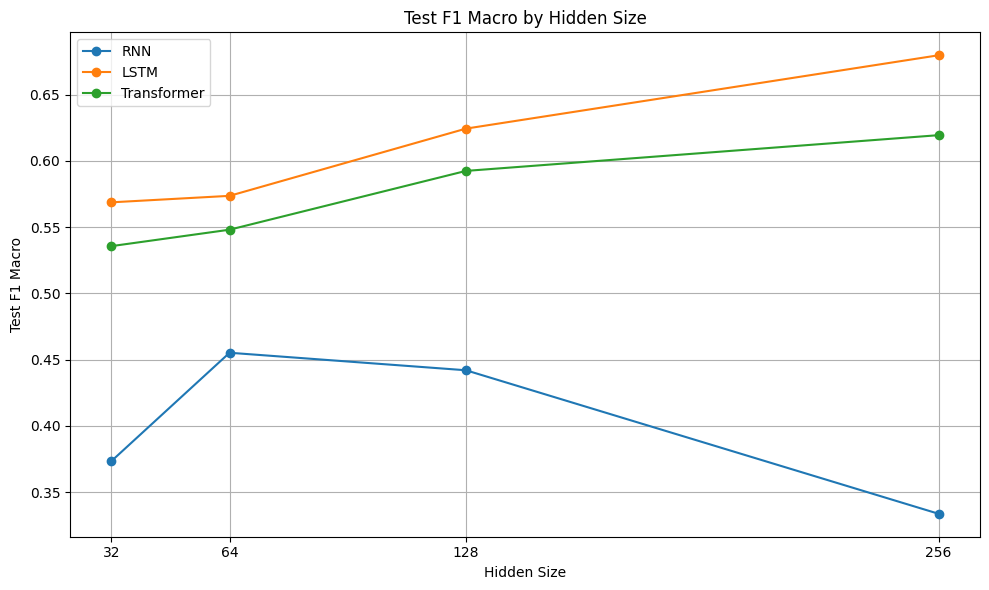

In [ ]:
metric = "Test F1 Macro"
gs_type = "Hidden Size"

def sum_accuracy_by_hidden_size(df):
    return df.groupby(gs_type)[metric].mean()

RNN_sum = sum_accuracy_by_hidden_size(RNN_df)
LSTM_sum = sum_accuracy_by_hidden_size(LSTM_df)
Transformer_sum = sum_accuracy_by_hidden_size(Transformer_df)

plt.figure(figsize=(10, 6))

plt.plot(RNN_sum.index, RNN_sum.values, marker='o', label='RNN')
plt.plot(LSTM_sum.index, LSTM_sum.values, marker='o', label='LSTM')
plt.plot(Transformer_sum.index, Transformer_sum.values, marker='o', label='Transformer')


plt.title('%s by %s'%(metric, gs_type))
plt.xlabel(gs_type)
plt.ylabel(metric)
plt.xticks(RNN_sum.index)
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

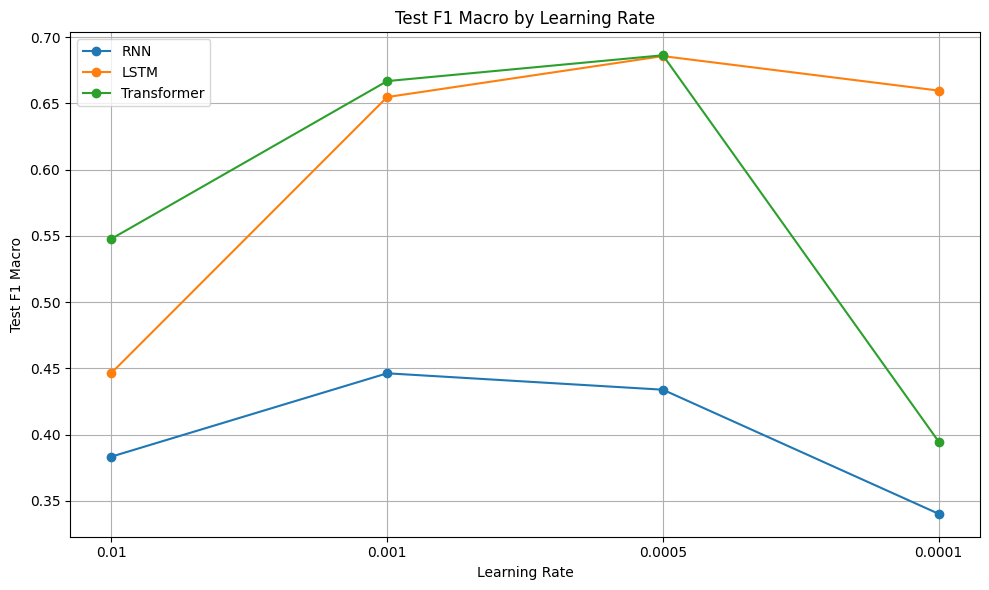

In [ ]:
metric = "Test F1 Macro"
gs_type = "Learning Rate"

def sum_accuracy_by_hidden_size(df):
    return df.groupby(gs_type)[metric].mean()

RNN_sum = sum_accuracy_by_hidden_size(RNN_df)
LSTM_sum = sum_accuracy_by_hidden_size(LSTM_df)
Transformer_sum = sum_accuracy_by_hidden_size(Transformer_df)

plt.figure(figsize=(10, 6))

if gs_type == "Learning Rate":
    xlabels = ["0.01", "0.001", "0.0005", "0.0001"]
    plt.plot(xlabels, RNN_sum.values, marker='o', label='RNN')
    plt.plot(xlabels, LSTM_sum.values, marker='o', label='LSTM')
    plt.plot(xlabels, Transformer_sum.values, marker='o', label='Transformer')

else:
    plt.plot(RNN_sum.index, RNN_sum.values, marker='o', label='RNN')
    plt.plot(LSTM_sum.index, LSTM_sum.values, marker='o', label='LSTM')
    plt.plot(Transformer_sum.index, Transformer_sum.values, marker='o', label='Transformer')


plt.title('%s by %s'%(metric, gs_type))
plt.xlabel(gs_type)
plt.ylabel(metric)
plt.grid()
plt.legend()
plt.tight_layout()

plt.show()

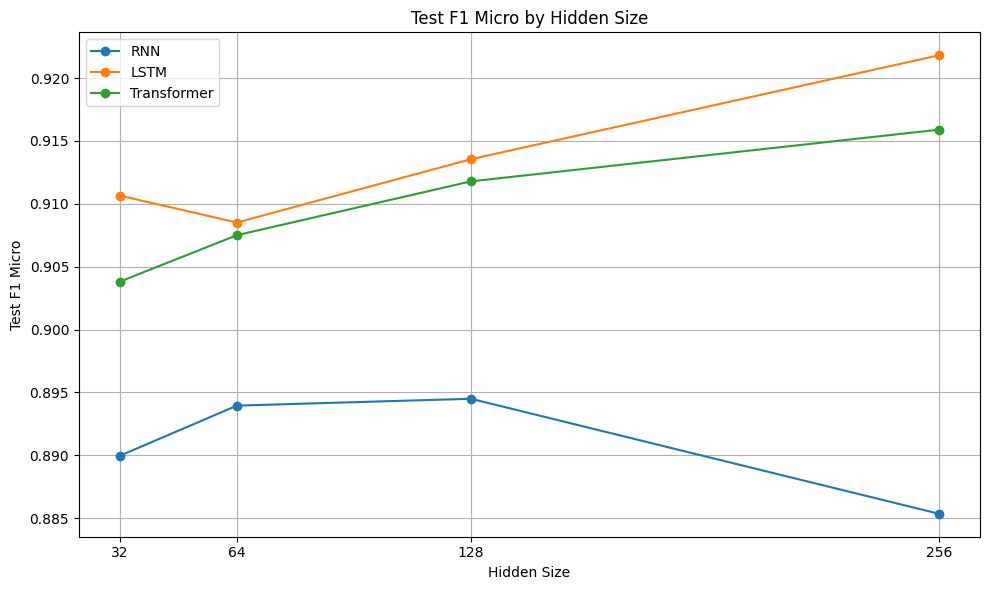

In [ ]:
metric = "Test F1 Micro"
gs_type = "Hidden Size"

def sum_accuracy_by_hidden_size(df):
    return df.groupby(gs_type)[metric].mean()

RNN_sum = sum_accuracy_by_hidden_size(RNN_df)
LSTM_sum = sum_accuracy_by_hidden_size(LSTM_df)
Transformer_sum = sum_accuracy_by_hidden_size(Transformer_df)

plt.figure(figsize=(10, 6))

if gs_type == "Learning Rate":
    xlabels = ["0.01", "0.001", "0.0005", "0.0001"]
    plt.plot(xlabels, RNN_sum.values, marker='o', label='RNN')
    plt.plot(xlabels, LSTM_sum.values, marker='o', label='LSTM')
    plt.plot(xlabels, Transformer_sum.values, marker='o', label='Transformer')

else:
    plt.plot(RNN_sum.index, RNN_sum.values, marker='o', label='RNN')
    plt.plot(LSTM_sum.index, LSTM_sum.values, marker='o', label='LSTM')
    plt.plot(Transformer_sum.index, Transformer_sum.values, marker='o', label='Transformer')


plt.title('%s by %s'%(metric, gs_type))
plt.xlabel(gs_type)
plt.ylabel(metric)
plt.grid()
plt.legend()
if gs_type != "Learning Rate":
    plt.xticks(RNN_sum.index)
plt.tight_layout()

plt.show()

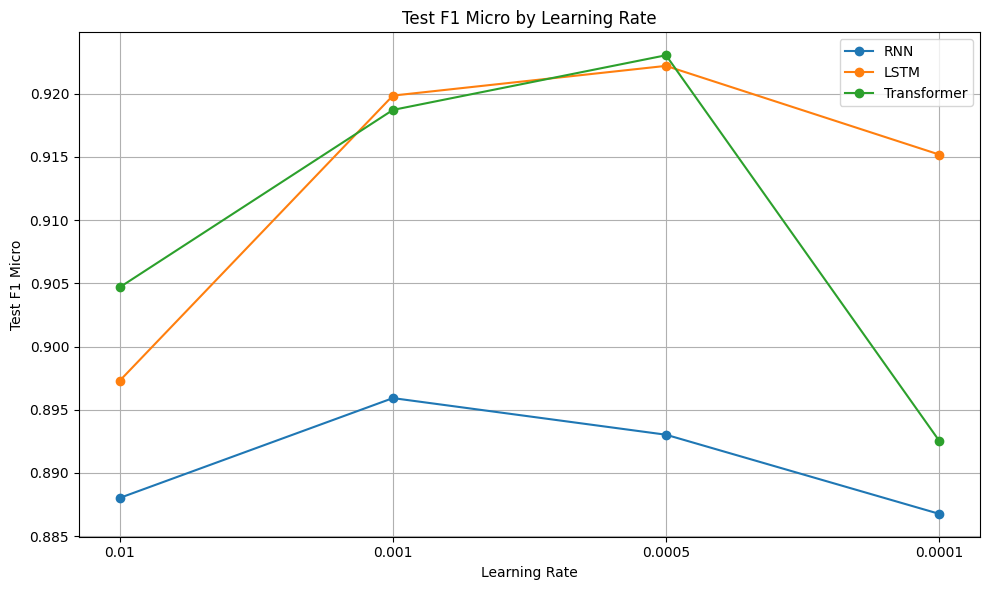

In [ ]:
metric = "Test F1 Micro"
gs_type = "Learning Rate"

def sum_accuracy_by_hidden_size(df):
    return df.groupby(gs_type)[metric].mean()

RNN_sum = sum_accuracy_by_hidden_size(RNN_df)
LSTM_sum = sum_accuracy_by_hidden_size(LSTM_df)
Transformer_sum = sum_accuracy_by_hidden_size(Transformer_df)

plt.figure(figsize=(10, 6))

if gs_type == "Learning Rate":
    xlabels = ["0.01", "0.001", "0.0005", "0.0001"]
    plt.plot(xlabels, RNN_sum.values, marker='o', label='RNN')
    plt.plot(xlabels, LSTM_sum.values, marker='o', label='LSTM')
    plt.plot(xlabels, Transformer_sum.values, marker='o', label='Transformer')

else:
    plt.plot(RNN_sum.index, RNN_sum.values, marker='o', label='RNN')
    plt.plot(LSTM_sum.index, LSTM_sum.values, marker='o', label='LSTM')
    plt.plot(Transformer_sum.index, Transformer_sum.values, marker='o', label='Transformer')


plt.title('%s by %s'%(metric, gs_type))
plt.xlabel(gs_type)
plt.ylabel(metric)
plt.grid()
plt.legend()
if gs_type != "Learning Rate":
    plt.xticks(RNN_sum.index)
plt.tight_layout()

plt.show()

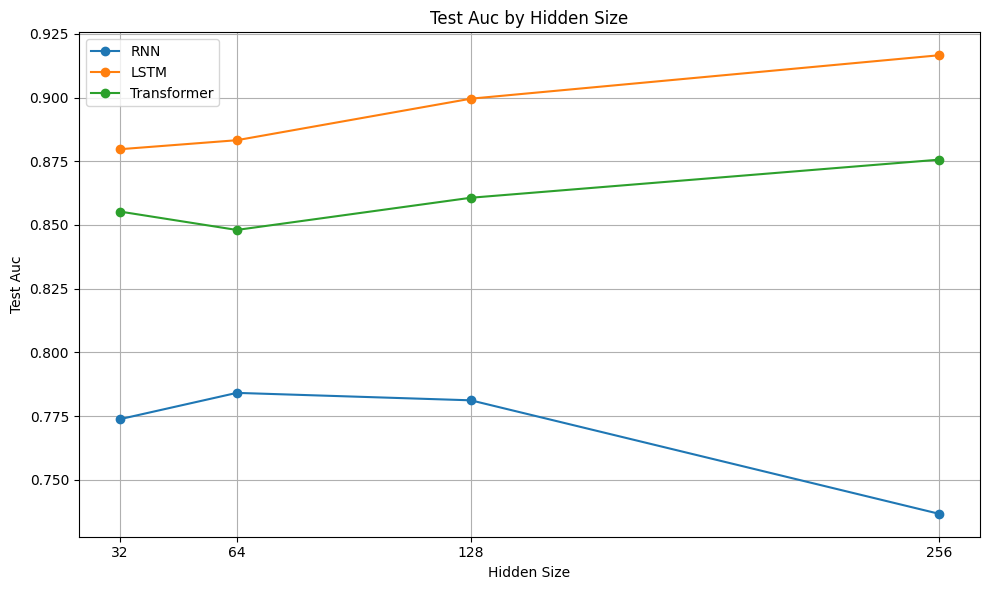

In [ ]:
metric = "Test Auc"
gs_type = "Hidden Size"

def sum_accuracy_by_hidden_size(df):
    return df.groupby(gs_type)[metric].mean()

RNN_sum = sum_accuracy_by_hidden_size(RNN_df)
LSTM_sum = sum_accuracy_by_hidden_size(LSTM_df)
Transformer_sum = sum_accuracy_by_hidden_size(Transformer_df)

plt.figure(figsize=(10, 6))

if gs_type == "Learning Rate":
    xlabels = ["0.01", "0.001", "0.0005", "0.0001"]
    plt.plot(xlabels, RNN_sum.values, marker='o', label='RNN')
    plt.plot(xlabels, LSTM_sum.values, marker='o', label='LSTM')
    plt.plot(xlabels, Transformer_sum.values, marker='o', label='Transformer')

else:
    plt.plot(RNN_sum.index, RNN_sum.values, marker='o', label='RNN')
    plt.plot(LSTM_sum.index, LSTM_sum.values, marker='o', label='LSTM')
    plt.plot(Transformer_sum.index, Transformer_sum.values, marker='o', label='Transformer')


plt.title('%s by %s'%(metric, gs_type))
plt.xlabel(gs_type)
plt.ylabel(metric)
plt.grid()
plt.legend()
if gs_type != "Learning Rate":
    plt.xticks(RNN_sum.index)
plt.tight_layout()

plt.show()

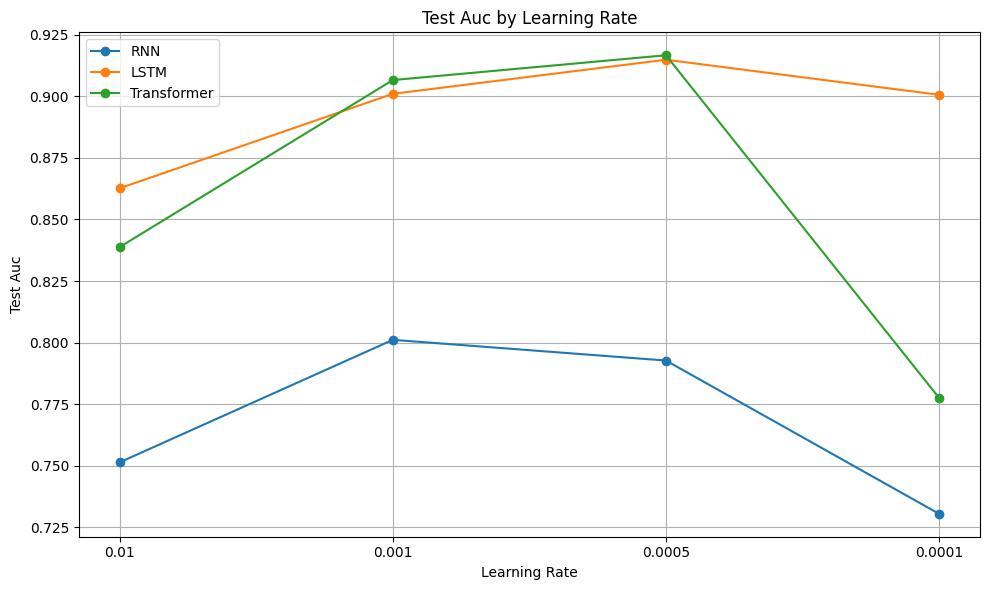

In [ ]:
metric = "Test Auc"
gs_type = "Learning Rate"

def sum_accuracy_by_hidden_size(df):
    return df.groupby(gs_type)[metric].mean()

RNN_sum = sum_accuracy_by_hidden_size(RNN_df)
LSTM_sum = sum_accuracy_by_hidden_size(LSTM_df)
Transformer_sum = sum_accuracy_by_hidden_size(Transformer_df)

plt.figure(figsize=(10, 6))

if gs_type == "Learning Rate":
    xlabels = ["0.01", "0.001", "0.0005", "0.0001"]
    plt.plot(xlabels, RNN_sum.values, marker='o', label='RNN')
    plt.plot(xlabels, LSTM_sum.values, marker='o', label='LSTM')
    plt.plot(xlabels, Transformer_sum.values, marker='o', label='Transformer')

else:
    plt.plot(RNN_sum.index, RNN_sum.values, marker='o', label='RNN')
    plt.plot(LSTM_sum.index, LSTM_sum.values, marker='o', label='LSTM')
    plt.plot(Transformer_sum.index, Transformer_sum.values, marker='o', label='Transformer')


plt.title('%s by %s'%(metric, gs_type))
plt.xlabel(gs_type)
plt.ylabel(metric)
plt.grid()
plt.legend()
if gs_type != "Learning Rate":
    plt.xticks(RNN_sum.index)
plt.tight_layout()

plt.show()